In [ ]:
import numpy as np
import tensorflow as tf
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, LSTM, Flatten, Activation, Dropout
from keras.layers.normalization import BatchNormalization
 
import matplotlib.pyplot as plt
 
# fix random seed for reproducibility
np.random.seed(7)

In [ ]:
#Loading the data and partitioning
(train_images,train_labels),(test_images,test_labels) = cifar10.load_data()

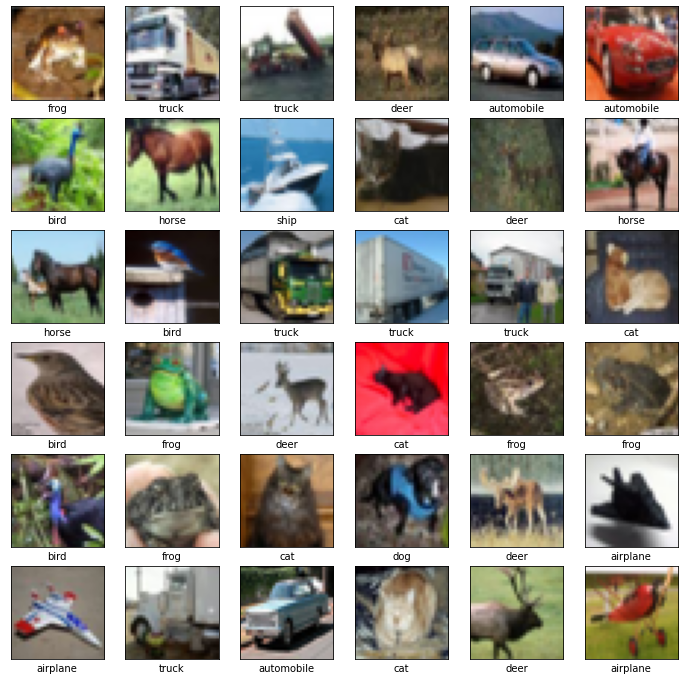

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(12,12))

for i in range(36):
    plt.subplot(6,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [ ]:
print("The training size is:",len(train_images))

print("\nA single image size is", train_images[1].shape)

The training size is: 50000

A single image size is (32, 32, 3)


In [ ]:
print("The test size is:",len(test_images))

The test size is: 10000


In [ ]:
#reshaping
train_images = train_images.reshape(50000,1024,3)

#shape of the image after reshaping
train_images[1].shape

(1024, 3)

In [ ]:
#reshaping test_images
test_images = test_images.reshape(10000,1024,3)

test_images[1].shape

(1024, 3)

In [ ]:
# Normalizing the pixel values to be between 0 and 1

train_images, test_images = train_images / 255.0, test_images / 255.0

-----------------------------------------------------------------------------

In [ ]:
#Creating the LSTM based model

# building a linear stack of layers with the sequential mode
model = Sequential([LSTM(32, input_shape = (1024,3), return_sequences= True),
                    Flatten(),
                    BatchNormalization(),
                    Dense(64, activation='relu'),
                    Dropout(0.4),
                    BatchNormalization(),
                    Dense(10, activation='softmax')
                    ])

In [ ]:
#Compiling and fitting the model

model.compile(optimizer='adam',
              loss= 'sparse_categorical_crossentropy',
              metrics=['accuracy'])


history = model.fit(train_images, train_labels, batch_size=50, epochs=12,
                    validation_data=(test_images, test_labels))

Epoch 1/12
1000/1000 [==============================] - 308s 305ms/step - loss: 2.0380 - accuracy: 0.3011 - val_loss: 1.5801 - val_accuracy: 0.4332
Epoch 2/12
1000/1000 [==============================] - 306s 306ms/step - loss: 1.6131 - accuracy: 0.4254 - val_loss: 1.4246 - val_accuracy: 0.4878
Epoch 3/12
1000/1000 [==============================] - 305s 305ms/step - loss: 1.5093 - accuracy: 0.4692 - val_loss: 1.5520 - val_accuracy: 0.4599
Epoch 4/12
1000/1000 [==============================] - 304s 304ms/step - loss: 1.4387 - accuracy: 0.4944 - val_loss: 1.3014 - val_accuracy: 0.5414
Epoch 5/12
1000/1000 [==============================] - 305s 305ms/step - loss: 1.3817 - accuracy: 0.5090 - val_loss: 1.2702 - val_accuracy: 0.5551
Epoch 6/12
1000/1000 [==============================] - 305s 305ms/step - loss: 1.3301 - accuracy: 0.5309 - val_loss: 1.2363 - val_accuracy: 0.5591
Epoch 7/12
1000/1000 [==============================] - 306s 306ms/step - loss: 1.2897 - accuracy: 0.5430 - val_

313/313 - 22s - loss: 1.1169 - accuracy: 0.6050
0.6050000190734863


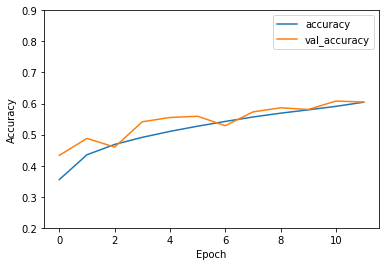

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.2, 0.9])
plt.legend(loc='upper right')
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print(test_acc)